<a href="https://colab.research.google.com/github/devseungil/TIL/blob/master/cnn%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \-O /content/cats_and_dogs_filtered.zip

--2023-03-02 08:00:55--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M  19.4MB/s    in 4.3s    

2023-03-02 08:01:00 (15.1 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

In [3]:
local_zip = '/content/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

In [4]:
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
#기본경로
base_dir = '/content/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
print(train_dir)          # /content/cats_and_dogs_filtered/train
print(validation_dir)     # /content/cats_and_dogs_filtered/validation

/content/cats_and_dogs_filtered/train
/content/cats_and_dogs_filtered/validation


In [6]:
# 훈련에 사용되는 개, 고양이 디렉토리 경로
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
print(train_cats_dir)         #/content/cats_and_dogs_filtered/train/cats
print(train_dogs_dir)         #/content/cats_and_dogs_filtered/train/dogs

/content/cats_and_dogs_filtered/train/cats
/content/cats_and_dogs_filtered/train/dogs


In [7]:
# 검증에 사용되는 개 고양이 폴더 경로
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
print(validation_cats_dir)      # /content/cats_and_dogs_filtered/validation/cats
print(validation_dogs_dir)      # /content/cats_and_dogs_filtered/validation/dogs

/content/cats_and_dogs_filtered/validation/cats
/content/cats_and_dogs_filtered/validation/dogs


In [8]:
train_cats_fnames=os.listdir(train_cats_dir)
train_dogs_fnames=os.listdir(train_dogs_dir)

print(train_cats_fnames[:5])
print(train_dogs_fnames[:5])

['cat.614.jpg', 'cat.532.jpg', 'cat.289.jpg', 'cat.427.jpg', 'cat.496.jpg']
['dog.563.jpg', 'dog.290.jpg', 'dog.410.jpg', 'dog.952.jpg', 'dog.303.jpg']


In [9]:
print("학습용 고양이 사진의 수:",len(train_cats_fnames))
print("학습용 강아지 사진의 수:",len(train_dogs_fnames))

학습용 고양이 사진의 수: 1000
학습용 강아지 사진의 수: 1000


In [10]:
validation_cats_fnames = os.listdir(validation_cats_dir)
validation_dogs_fnames = os.listdir(validation_dogs_dir)

print(validation_cats_fnames[:5])
print(validation_dogs_fnames[:5])

['cat.2115.jpg', 'cat.2444.jpg', 'cat.2257.jpg', 'cat.2230.jpg', 'cat.2041.jpg']
['dog.2366.jpg', 'dog.2281.jpg', 'dog.2123.jpg', 'dog.2242.jpg', 'dog.2205.jpg']


In [11]:
print("검증용 고양이 사진의 수:",len(validation_cats_fnames))
print("검증용 강아지 사진의 수:",len(validation_dogs_fnames))

검증용 고양이 사진의 수: 500
검증용 강아지 사진의 수: 500


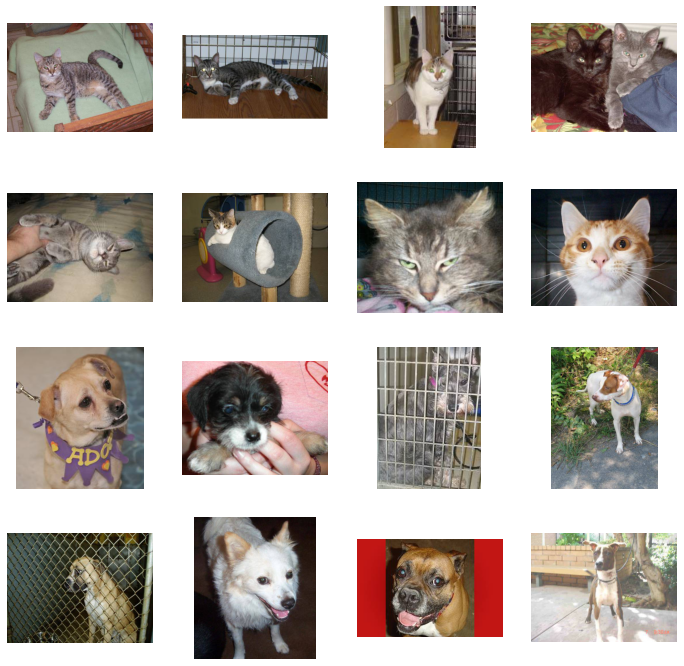

In [12]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)for fname in train_cats_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)for fname in train_dogs_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255) 
# 이미지 픽셀을 0에서 1사이의 값으로 스케일을 조정한다.

In [14]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    target_size=(150,150),
                                                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [15]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                      batch_size=20,
                                                      target_size=(150,150),
                                                      class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [16]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
# model.summary()

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [18]:
def get_step(train_len, batch_size):
    if(train_len % batch_size > 0):
        return train_len // batch_size + 1
    else:
        return train_len // batch_size

In [19]:
history = model.fit(
      train_generator,
      steps_per_epoch=get_step(2000, 32),
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
63/63 [==============================] - 19s 133ms/step - loss: 0.7015 - acc: 0.5143 - val_loss: 0.6935 - val_acc: 0.4950
Epoch 2/100
63/63 [==============================] - 8s 127ms/step - loss: 0.6899 - acc: 0.5270 - val_loss: 0.6895 - val_acc: 0.5000
Epoch 3/100
63/63 [==============================] - 7s 110ms/step - loss: 0.6905 - acc: 0.5333 - val_loss: 0.6909 - val_acc: 0.5340
Epoch 4/100
63/63 [==============================] - 8s 124ms/step - loss: 0.6865 - acc: 0.5405 - val_loss: 0.6898 - val_acc: 0.5360
Epoch 5/100
63/63 [==============================] - 8s 124ms/step - loss: 0.6802 - acc: 0.5762 - val_loss: 0.6841 - val_acc: 0.5520
Epoch 6/100
63/63 [==============================] - 8s 122ms/step - loss: 0.6717 - acc: 0.5913 - val_loss: 0.6800 - val_acc: 0.5570
Epoch 7/100
63/63 [==============================] - 7s 109ms/step - loss: 0.6697 - acc: 0.5683 - val_loss: 0.6751 - val_acc: 0.5740
Epoch 8/100
63/63 [==============================] - 8s 125ms/step -

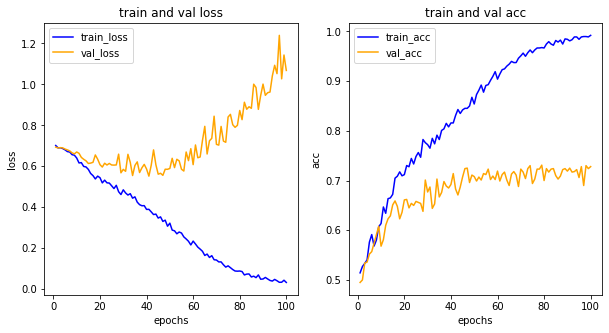

In [20]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

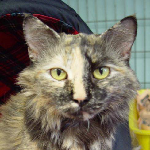

In [22]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img = image.load_img('/content/cats_and_dogs_filtered/train/cats/cat.10.jpg',
                     target_size = (150,150))
img

In [24]:
x = image.img_to_array(img)

In [25]:
print('전',x.shape)
images = np.expand_dims(x, axis=0)
print('후',images.shape)

전 (150, 150, 3)
후 (1, 150, 150, 3)


In [26]:
classes = model.predict(images , batch_size=10)
classes

1/1 [==============================] - 0s 267ms/step


array([[0.]], dtype=float32)

In [27]:
def pred(fname) :
  img = image.load_img(fname , target_size=(150,150))
  plt.imshow(img)

  x = image.img_to_array(img) 
  images = np.expand_dims(x, axis=0)

  classes = model.predict(images , batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fname.split('/')[-1] + "사진은 강아지 입니다")
  else :
    print(fname.split('/')[-1] + "사진은 고양이 입니다")

1/1 [==============================] - 0s 21ms/step
[1.]
img (1).jpg사진은 강아지 입니다


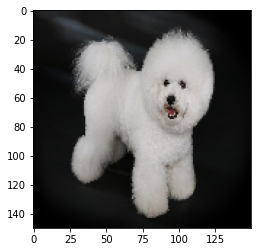

In [33]:
pred('/content/img (1).jpg')